## P6 Custom Data Analysis Project
Derek Fintel, 02/18/2025

Forensics Analyst II, D555

Contact: s542635@nwmissouri.edu


### Notebook Introduction 
Thank you for taking time to review this analysis report. This notebook utilizes juptyer, python, pandas, seaborn, and others, to compile specific analyses of "miles-per-gallon" data, sourced from a clean native seaborn dataset. Additionally, the dataset was modified to introduce a new criteria as well as modify existing units of measure to more commonly used units. This notebook is broken down into numbered steps and charts, i.e. Step 1, Chart 1, etc. 

*** For more administrative information, please see the README.md file.

### Analysis Hypotheses & Objectives
1) Is there a correlation between mpg and vehicle performance?
2) Is there a correlation between manufacturer origin and mpg?
3) What kind of insights can we glean from engine information?
4) Provide visualizations to derive understandings

### Step 3: Import Dependencies
Here we import our modules early into the program, specifically ones that are needed to support our analysis - matplotlib, pandas, & seaborn. 

In [349]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Step 1: Data Acquisition
In this step, we establish the dataframe by loading the 'mpg' dataset with seaborn via sns. 

We then print the df.head() to provide an overview of the initial column & data information. 

In [350]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df = sns.load_dataset('mpg')

# Inspect first rows of the DataFrame
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Step 2: Initial Data Inspection
Below you will find the calls: df.head(50), df.shape, & df.dtypes. These functions call into the dataset and conduct an analysis of the data organization, shapes, and types. 

In [351]:
print(df.head(50))
print(df.shape)
print(df.dtypes)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0    3504          12.0   
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10  15.0          8         383.0       170.0    3563          10.0   
11  14.0          8         340.0       160.0    3609           8.0   
12  15.0          8         400.0       150.0    3761           9.5   
13  14

### Step 3: Initial Descriptive Statistics
This step actions native statistic capabilities within seaborn via df.describe(). We print the function to reveal the initial statistical information found. 

In [352]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### Step 4: Initial Distribution of Columns
The functions below provide an initial visualization of the distribution & plotting of data within the dataset. You'll find 7 mini charts that pull column specific data together, later we'll use jointplot() to analyze relationships between data elements. 

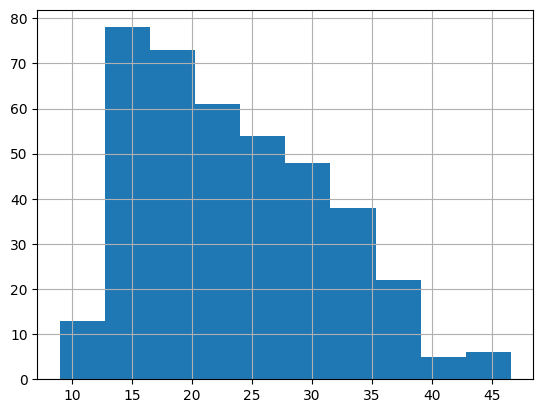

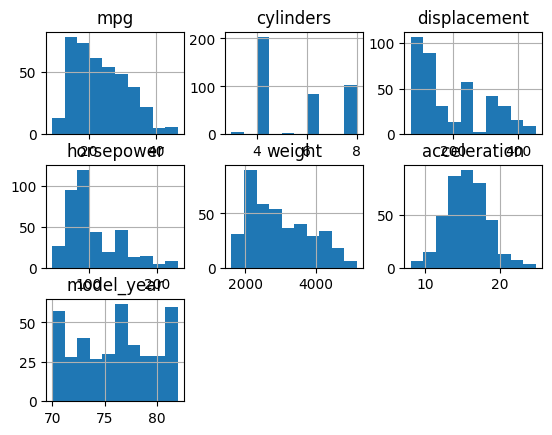

In [353]:
# Inspect histogram by numerical column
df['mpg'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Step 5: Initial Distribution of Categories
In this step, we call upon value_count, select.dtypes, and countplot to capture the total catgorical information and plot them into columns. The first histogram shows totals per origin, the latter is a total of all information. 

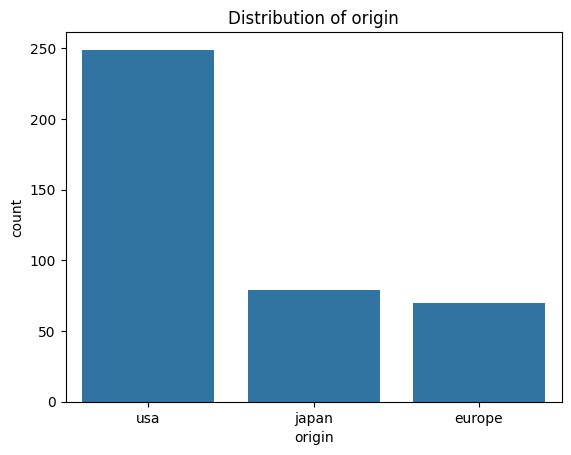

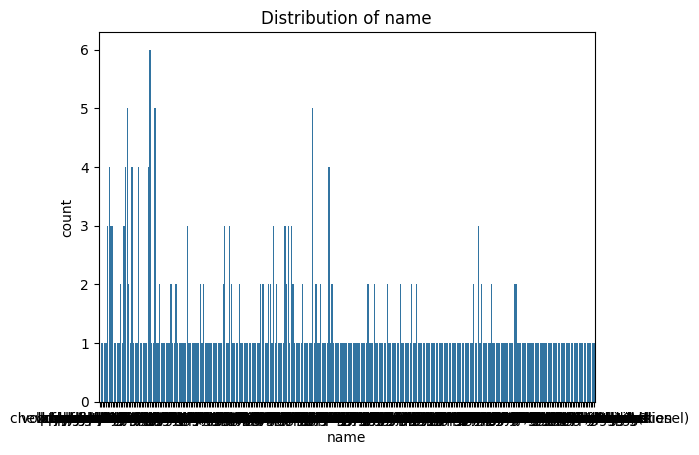

In [354]:
# Inspect value counts by categorical column
df['mpg'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show() 

### Step 6: Initial Data Transformation and Feature Engineering
With our initial observation of the available data, a couple elements needed adjustment to support or readability and relationship analysis. 

Changes in particular: 
1) We adjust the "displacement" column in both title and measurement, we change it to "displacement_cc" and convert the original unit of measure from cubic inches to cubic centimeters. We also round the value to two decimal points.
2) We create a new column/element, called "Pwr/Wt_Ratio" = Power to Weight Ratio. We calculate this by dividing the 'weight' by the 'horsepower'. We also round the value to two decimal points.
3) We then write the changes to the dataset.
4) We also write the changes to the utilized csv, "seaborn-data_mpg.csv".

In [355]:
df = sns.load_dataset('mpg')
df['displacement_cc'] = round((df['displacement'] * 16.3871), 2)
df['Pwr/Wt_Ratio'] = round((df['weight'] / df['horsepower']),2)
df.to_csv('seaborn-data_mpg.csv', index=False)
df_saved = pd.read_csv('seaborn-data_mpg.csv')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  displacement_cc  Pwr/Wt_Ratio  
0          70    usa  chevrolet chevelle malibu          5030.84         26.95  
1          70    usa          buick skylark 320          5735.48         22.38  
2          70    usa         plymouth satellite          5211.10         22.91  
3          70    usa              amc rebel sst          4981.68         22.89  
4          70    usa                ford torino          4948.90         24.64  


### Step 7: Initial visualizations
In this section, we'll begin demonstrating various charting analyses to reveal relationships across the dataset.

Chart 1: Performance Analysis A

In this chart, we find relationships between vehicle weight, its horsepower, and acceleration. 

Takeaway: Higher horsepower engines see lower acceleration. Heavier vehicles are associated with higher horsepower. 

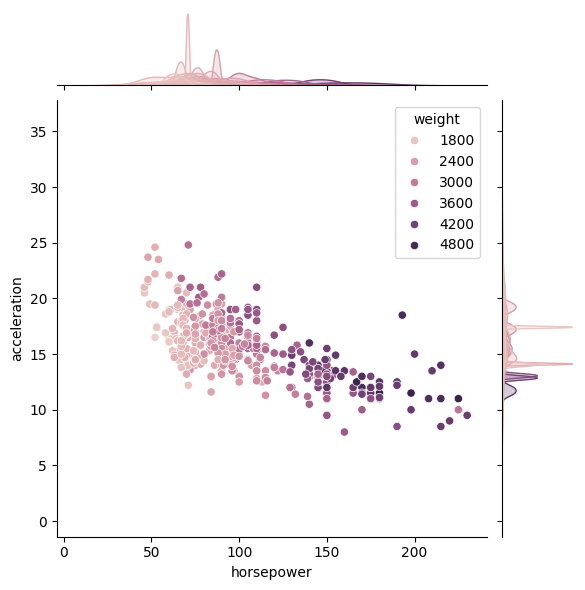

In [356]:
data = sns.load_dataset("mpg")
sns.jointplot(data=data, x="horsepower", y="acceleration", hue="weight")

Chart 2: Performance Analysis B

For this chart, we analyze the relationships between engine cylinders, the car's acceleration, and its horsepower. 

Takeaway: Engines that have higher horsepower and lower acceleration typically have 6 to 8 cylinders. 

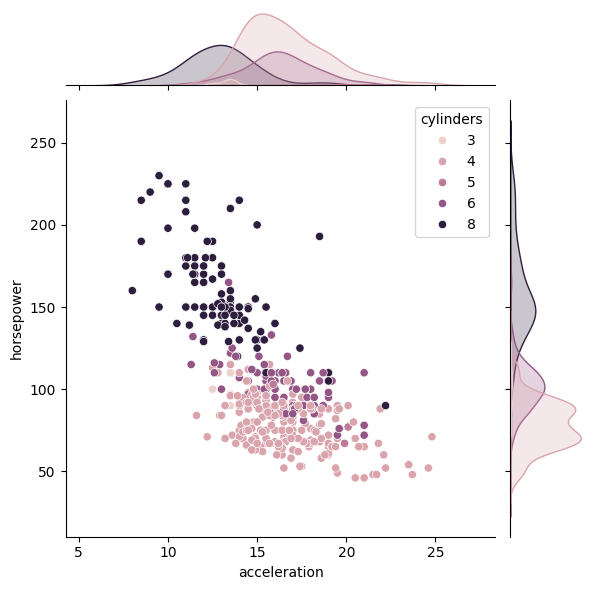

In [357]:
data = sns.load_dataset("mpg")
sns.jointplot(data=data, x="acceleration", y="horsepower", hue="cylinders")

Chart 3: Performance Analysis C

This chart analyzes the relationship between a vehicles engine cylinders, weight, and mpg. 

Takeaway: There is a distinct correlation of heavier cars also have larger engines, 6-8 cylinders, and thus much lower mpg.

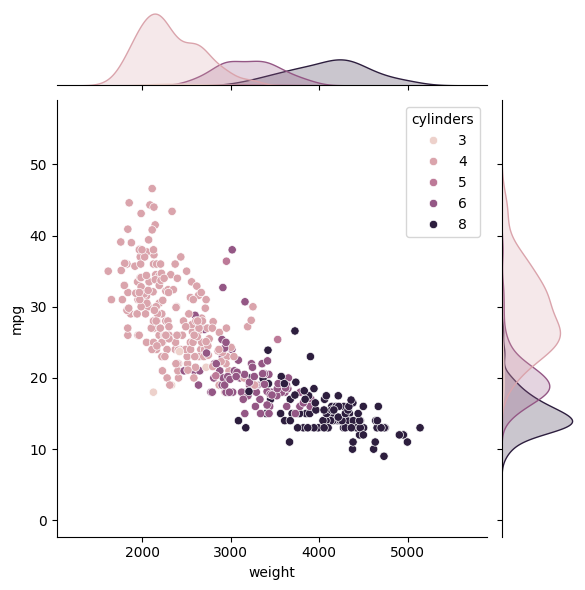

In [358]:
mpg = sns.load_dataset("mpg")
sns.jointplot(data=mpg, x="weight", y="mpg", hue="cylinders")

Chart 4: Performance Analysis D

This view takes into account the physical engine size, here in cubic-centimeters (CC), and analyses the trends over production years and their relation to mpg. 

Takeaway: We find that in earlier years, ~1970's, there is a high correlation of large displacement engines being built but we gradually find their population lowering and smaller, more mpg efficient engines growing over the following years. 

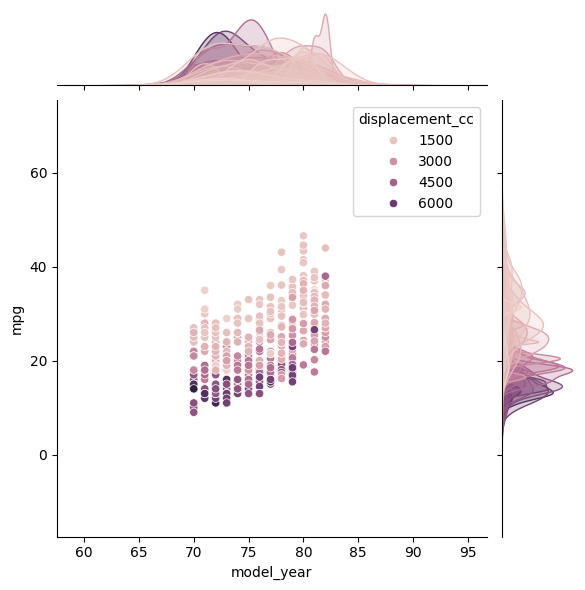

In [359]:
sns.jointplot(data=df, x="model_year", y="mpg", hue="displacement_cc")

Chart 5: Empiricial MPG Data

These charts provide distribution and treadline views of the total count of vehicles and mpg per a given origin.

Takeaway: We find that the US produced the majority of the cars in this dataset and timeperiod but also produced the lowest performing in regards to mpg. European cars had mostly stable sales and performance but were not keenly efficient. Japanese cars held a higher average of efficient vehicles. 

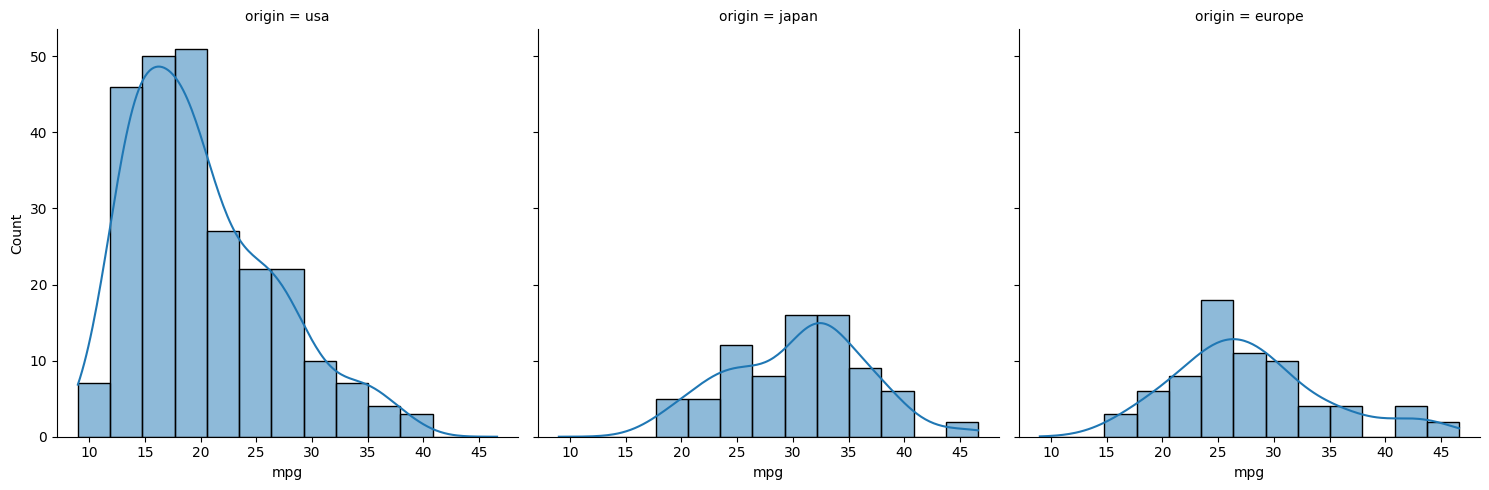

In [360]:
sns.displot(data=mpg, x="mpg", col="origin", kde=True)

Chart 6: Empirical Sales Data

This chart provides a stacked column chart showing the total distribution of sales per origin over our measured time period. 

Takeaway: The USA dominated overall in vehicle sales but gradually begins to offset with the introduction of later model, fuel efficient Japanese cars. 

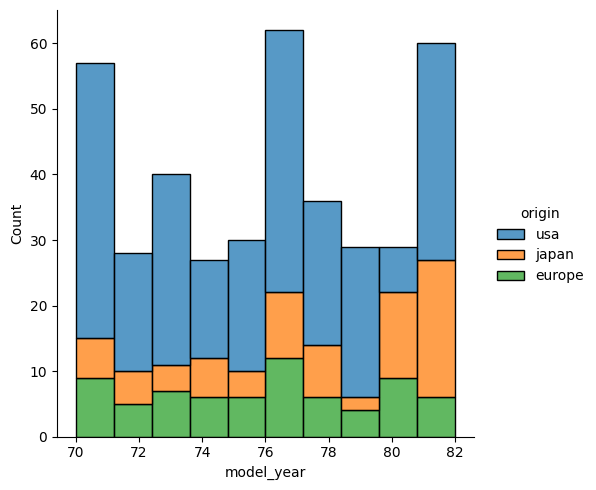

In [361]:
sns.displot(data=mpg, x="model_year", hue="origin", multiple="stack")

### Summary

This analysis, statiscal framing, and the visualzations provide clarity to our original hyoptheses and objectives:
1) Is there a correlation between mpg and vehicle performance?
   1) Ans: Most definitely, the two have a direct relationship. In this time period, high performance often equated to lesser fuel efficiency.
2) Is there a correlation between manufacturer origin and mpg?
   1) Ans: Yes, indeed the USA took first place in the least efficient vehicles.
3) What kind of insights can we glean from engine information?
   1) Ans: During this time period, the smaller displacement engines and vehicles with a higher power-to-weight ratio, often saw the best mpg performance. 
4) Provide visualizations to derive understandings


I sincerely appreciate your time and review of this research. Please connect with me should you have any questions, comments, or critiques. 

Should you commission further research, hypotheses I would recommend are:
1) What was the cost per vehicle during this timeframe?
2) What was the cost of gas over this timeframe?
3) Re-frame this analysis and additional questions above against current vehicle and gas statistics. 

Thank you - Derek